### Imports

In [2]:
%config Completer.use_jedi = False # for auto complete to work on my pc.

#imports to move and file mangement
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob

In [28]:
img_path = r'D:\bcd_data\Cancer\C_0309_1.LEFT_MLO.png'   # + '\\'

img = cv2.imread(img_path)
print(img.shape)


width, height = 400, 400;
imgCrop = cv2.resize(img, (width, height))

imgCrop = imgCrop[50:380,25:350] 

cv2.imshow("crop", imgCrop)

cv2.waitKey(0)

(2356, 1452, 3)


-1

In [37]:
width, height = 400, 400

cancer_path = r'D:\bcd_data\Cancer\*.png'
normal_path = r'D:\bcd_data\Normal\*.png'

c = 0

for filename in glob.glob(cancer_path):
    image = cv2.imread(filename)
    imgCrop = cv2.resize(image, (width, height))
    imgCrop = imgCrop[50:380,25:350]
    status = cv2.imwrite(filename,imgCrop)
    if bool(status) == True:
        c+=1
    else:
        c-=1
        
print(c)


#2717 cancer

2717


In [38]:
b = 0

for filename in glob.glob(normal_path):
    image = cv2.imread(filename)
    imgCrop = cv2.resize(image, (width, height))
    imgCrop = imgCrop[50:380,25:350]
    status = cv2.imwrite(filename,imgCrop)
    if bool(status) == True:
        b+=1
    else:
        b-=1
        
print(b)

#2409 normal

0


### Moving Files

In [ ]:
# get images of the scans with cancer cells and cuts it to a folder, only need this to run ONCE.

#src_dir = r'D:\Breast Cancer Diagnosis\Dataset\copy\Cancer' + '\\' # source folder with subfolders that contain the images
#target_dir = r'D:\bs_data\Cancer'+ '\\' # destination which i am copying the files to

#for path, dir, files in os.walk(src_dir): # loop through all files in the source folder
    #if files: # subfolders
        #for img in files: # loop through every image in every subfolder
            #if not os.path.isfile(target_dir + img): #if not a duplicate
                #os.rename(path + '\\' + img, target_dir + img) # cut to new folder

In [ ]:
#get images of the scans with normal cells and cuts it to a folder, only need this to run ONCE.

#src_dir = r'D:\Breast Cancer Diagnosis\Dataset\copy\Normal' + '\\' # source folder with subfolders that contain the images
#target_dir = r'D:\bs_data\Normal'+ '\\' # destination which i am copying the files to

#for path, dir, files in os.walk(src_dir): # loop through all files in the source folder
    #if files: # subfolders
        #for img in files: # loop through every image in every subfolder
            #if not os.path.isfile(target_dir + img): #if not a duplicate
                #os.rename(path + '\\' + img, target_dir + img) # cut to new folder

## `Image Pre-Processing`

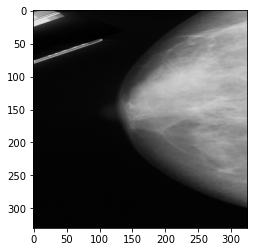

In [39]:
DATADIR = r'D:\bcd_data'
CATEGORIES = ["Normal", "Cancer"] # two labels

for category in CATEGORIES: # loops 2 times
    path = os.path.join(DATADIR, category) # gets path
    class_num = CATEGORIES.index(category) # class_num is 0 for normal, 1 for cancer
    for img in os.listdir(path): # for each img in path
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # convert img to a grayscale array 
        plt.imshow(img_arr, cmap='gray') # display img.
        plt.show()# show
        break
    break 

In [40]:
print(img_arr.shape) # dimensions of the above image

(330, 325)


### Resizing

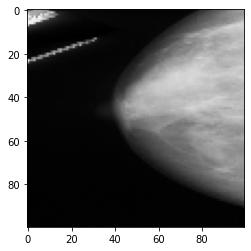

In [41]:
IMG_SIZE = 100 # var to store img size i.e 100*100
new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # new image that is resized
plt.imshow(new_arr, cmap= 'gray')

## `Create Training Data`

In [42]:
training_data =  [] # array that stores all images

def create_training_data():
    for category in CATEGORIES: #  same iterator as above
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path): 
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # convert to image
            new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # resize image and store in new img
            training_data.append([new_arr, class_num]) # add image to training data
            
            
create_training_data() # function call

In [43]:
print(len(training_data)) # total num of imgs

5124


In [44]:
import random
random.shuffle(training_data) # shuffle order images

In [45]:
for sample in training_data[:10]: # randomized order view
    print(sample[1])

0
0
0
1
0
1
0
1
1
1


### Features and labels creation

In [46]:
X = [] #features
y = [] #labels

In [47]:
for features, label in training_data:
    X.append(features) #add image
    y.append(label) # add label
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # reshape features.

### Save as npy 

In [48]:
np.save("X.npy", X)
np.save("y.npy", y)